In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [218]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error, accuracy_score
from datetime import datetime

In [219]:
data = pd.read_excel("/Users/hemalpatel/Downloads/Invoice Prediction Model db.xls")

In [220]:
#check the data types and information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Invoice date issued  50 non-null     datetime64[ns]
 1   Project              50 non-null     object        
 2   Amount in €          50 non-null     int64         
 3   Department           50 non-null     object        
 4   Person               50 non-null     object        
 5   Paid date            50 non-null     datetime64[ns]
 6   Due date             50 non-null     datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(3)
memory usage: 2.9+ KB


In [221]:
# #describing the statistical nature of data
# data.describe()

In [222]:
data.head()

,Invoice date issued,Project,Amount in €,Department,Person,Paid date,Due date
0,2022-02-12,CodeAcademy,2000,HR,Natalie Morgan,2022-02-19,2022-03-01
1,2022-01-27,JoinStart,3491,IT,Sophie Jackson,2022-02-03,2022-02-13
2,2022-01-25,TechMissle,6334,Accounting,Sarah Taylor,2022-02-01,2022-02-11
3,2022-01-28,JMK,4752,Sales,Emily Davies,2022-02-04,2022-02-14
4,2022-01-29,HackerRank,2079,Marketing,Emma Jones,2022-02-05,2022-02-15


In [223]:
#check the number of unique values in each column
data_count_unique = data.nunique().to_frame(name = 'Counts')
data_count_unique

,Counts
Invoice date issued,31
Project,7
Amount in €,48
Department,12
Person,50
Paid date,31
Due date,31


In [224]:
#extract the temporal ascepts from date for eg: month, year, date, dayofweek etc.
data['Invoice_issued_date'] = data['Invoice date issued'].dt.day
data['Issued_day_name'] = data['Invoice date issued'].dt.day_name()
data['Issued_month'] = data['Invoice date issued'].dt.month

#Converting timestamp64[ns] to int
data['Due_date'] = data['Due date'].dt.day
data['Due_day_name'] = data['Due date'].dt.day_name()
data['Due_month'] = data['Due date'].dt.month
data.head()

,Invoice date issued,Project,Amount in €,Department,Person,Paid date,Due date,Invoice_issued_date,Issued_day_name,Issued_month,Due_date,Due_day_name,Due_month
0,2022-02-12,CodeAcademy,2000,HR,Natalie Morgan,2022-02-19,2022-03-01,12,Saturday,2,1,Tuesday,3
1,2022-01-27,JoinStart,3491,IT,Sophie Jackson,2022-02-03,2022-02-13,27,Thursday,1,13,Sunday,2
2,2022-01-25,TechMissle,6334,Accounting,Sarah Taylor,2022-02-01,2022-02-11,25,Tuesday,1,11,Friday,2
3,2022-01-28,JMK,4752,Sales,Emily Davies,2022-02-04,2022-02-14,28,Friday,1,14,Monday,2
4,2022-01-29,HackerRank,2079,Marketing,Emma Jones,2022-02-05,2022-02-15,29,Saturday,1,15,Tuesday,2


In [225]:
#calculating some aspects from data for eg : total time to pay, paid in, paid before deadline
data['Paid In'] = data['Paid date'] - data['Invoice date issued']
data['Paid Before Deadline'] = data['Due date'] - data['Paid date']
data['Total time to pay'] = data['Due date'] - data['Invoice date issued']

#Converting timestamp64[ns] to int
data['Paid In'] = data['Paid In'].dt.days
data['Paid Before Deadline'] = data['Paid Before Deadline'].dt.days
data['Total time to pay'] = data['Total time to pay'].dt.days                                                    


data.head()
df = data.copy()

In [288]:
print(df['Paid In'].unique())
print(df['Paid Before Deadline'].unique())
print(df['Total time to pay'].unique())

[7]
[10  9]
[17 16]


In [226]:
df.head()

,Invoice date issued,Project,Amount in €,Department,Person,Paid date,Due date,Invoice_issued_date,Issued_day_name,Issued_month,Due_date,Due_day_name,Due_month,Paid In,Paid Before Deadline,Total time to pay
0,2022-02-12,CodeAcademy,2000,HR,Natalie Morgan,2022-02-19,2022-03-01,12,Saturday,2,1,Tuesday,3,7,10,17
1,2022-01-27,JoinStart,3491,IT,Sophie Jackson,2022-02-03,2022-02-13,27,Thursday,1,13,Sunday,2,7,10,17
2,2022-01-25,TechMissle,6334,Accounting,Sarah Taylor,2022-02-01,2022-02-11,25,Tuesday,1,11,Friday,2,7,10,17
3,2022-01-28,JMK,4752,Sales,Emily Davies,2022-02-04,2022-02-14,28,Friday,1,14,Monday,2,7,10,17
4,2022-01-29,HackerRank,2079,Marketing,Emma Jones,2022-02-05,2022-02-15,29,Saturday,1,15,Tuesday,2,7,10,17


<AxesSubplot:xlabel='Issued_day_name', ylabel='Amount in €'>

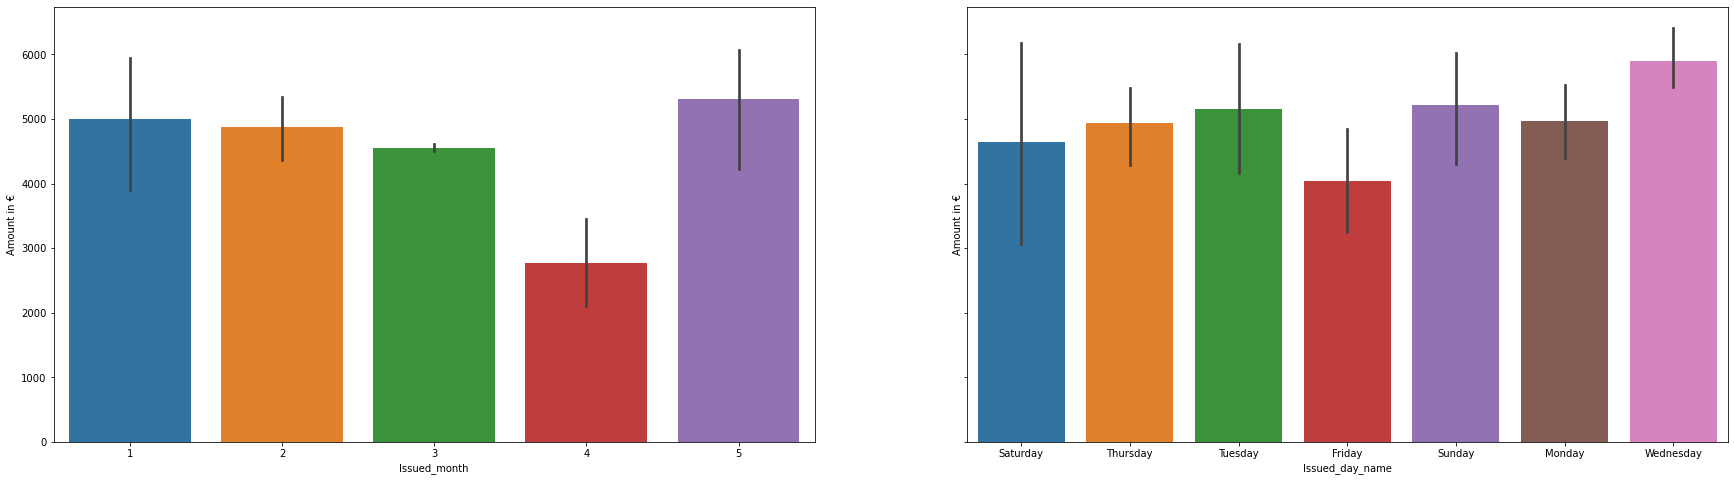

In [228]:
#distribution of amount in euros paid monthly and by day
fig, axes = plt.subplots(1, 2, figsize=(30, 8), sharey=True)
sns.barplot(ax=axes[0],x="Issued_month", y="Amount in €", data=df)
sns.barplot(ax=axes[1],x="Issued_day_name", y="Amount in €", data=df)

<AxesSubplot:xlabel='Project', ylabel='Amount in €'>

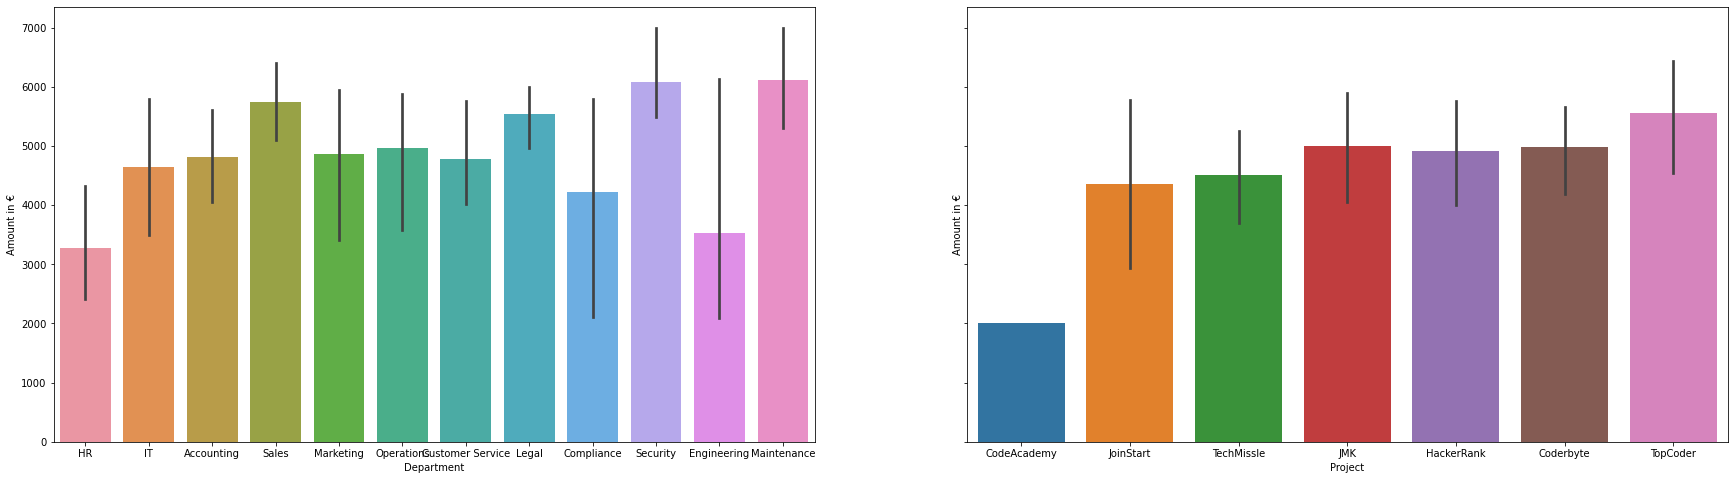

In [229]:
#distribution of amount wrt to particular department and particular project
fig, axes = plt.subplots(1, 2, figsize=(30, 8), sharey=True)
sns.barplot(ax=axes[0],x="Department", y="Amount in €", data=df)
sns.barplot(ax=axes[1],x="Project", y="Amount in €", data=df)

In [230]:
# fig, axes = plt.subplots(1, 2, figsize=(30, 8), sharey=True)
# axes[0]=sns.catplot(x="Department", y="Amount in €", data=data)
# axes[1]=sns.catplot(x="Project", y="Amount in €", data=data)

In [232]:
df.isna().sum()

Invoice date issued     0
Project                 0
Amount in €             0
Department              0
Person                  0
Paid date               0
Due date                0
Invoice_issued_date     0
Issued_day_name         0
Issued_month            0
Due_date                0
Due_day_name            0
Due_month               0
Paid In                 0
Paid Before Deadline    0
Total time to pay       0
dtype: int64

In [233]:
# data['Amount in €'] = data['Amount in €'].astype(np.float64)
df['Amount'] = data['Amount in €']
df.head()

,Invoice date issued,Project,Amount in €,Department,Person,Paid date,Due date,Invoice_issued_date,Issued_day_name,Issued_month,Due_date,Due_day_name,Due_month,Paid In,Paid Before Deadline,Total time to pay,Amount
0,2022-02-12,CodeAcademy,2000,HR,Natalie Morgan,2022-02-19,2022-03-01,12,Saturday,2,1,Tuesday,3,7,10,17,2000
1,2022-01-27,JoinStart,3491,IT,Sophie Jackson,2022-02-03,2022-02-13,27,Thursday,1,13,Sunday,2,7,10,17,3491
2,2022-01-25,TechMissle,6334,Accounting,Sarah Taylor,2022-02-01,2022-02-11,25,Tuesday,1,11,Friday,2,7,10,17,6334
3,2022-01-28,JMK,4752,Sales,Emily Davies,2022-02-04,2022-02-14,28,Friday,1,14,Monday,2,7,10,17,4752
4,2022-01-29,HackerRank,2079,Marketing,Emma Jones,2022-02-05,2022-02-15,29,Saturday,1,15,Tuesday,2,7,10,17,2079


In [234]:
df.drop(columns=['Invoice date issued','Amount in €','Project','Department','Person','Paid date','Due date','Issued_day_name','Due_day_name'],inplace=True)

In [235]:
# numerical_features = []

In [236]:
# df_dtypes = df.dtypes
#categorical_features = list(df_dtypes[df_dtypes =='O'].index)
# numerical_features =list(df_dtypes[df_dtypes !='O'].index)

In [237]:
# categorical_features

In [238]:
# categorical_features.remove('Project')
# categorical_features.remove('Department')

In [239]:
# numerical_features

In [240]:
# numerical_features.remove('Paid In')

In [241]:
#numerical_features.remove('Predicted days')

In [242]:
# for col in categorical_features:
#     print(col,df[col].nunique())

In [243]:
# for col in numerical_features:
#     print(col,df[col].nxxxxxxxunique())

In [244]:
df.dtypes

Invoice_issued_date     int64
Issued_month            int64
Due_date                int64
Due_month               int64
Paid In                 int64
Paid Before Deadline    int64
Total time to pay       int64
Amount                  int64
dtype: object

In [245]:
# numeric_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
# numerical_feature_values = numeric_imputer.fit_transform(df[numerical_features].values)
# categorical_feature_values = category_imputer.fit_transform(df[categorical_features].values)

In [246]:
# scaler = StandardScaler()

In [247]:
# numerical_feature_values_scaled = scaler.fit_transform(numerical_feature_values)
# len(numerical_feature_values_scaled.shape)

In [248]:
# ohe = OneHotEncoder()

In [249]:
# ohe_values = ohe.fit_transform(categorical_feature_values).toarray()

In [250]:
X = df.copy()
X.drop(columns=['Paid In','Paid Before Deadline'],inplace=True)
Y = df['Paid In']

# X = np.hstack([numerical_features])
# Y = data[target].values

In [251]:
X.head()

,Invoice_issued_date,Issued_month,Due_date,Due_month,Total time to pay,Amount
0,12,2,1,3,17,2000
1,27,1,13,2,17,3491
2,25,1,11,2,17,6334
3,28,1,14,2,17,4752
4,29,1,15,2,17,2079


In [252]:
print(X.shape)
print(Y.shape)

(50, 6)
(50,)


In [279]:
print(X_train)
print(Y_train)

    Invoice_issued_date  Issued_month  Due_date  Due_month  Total time to pay  \
18                    7             2        24          2                 17   
46                   16             2         5          3                 17   
12                    1             5        18          5                 17   
23                    6             2        23          2                 17   
25                   11             2        28          2                 17   
3                    28             1        14          2                 17   
39                   26             2        15          3                 17   
15                   19             2         8          3                 17   
41                   17             2         6          3                 17   
19                   28             3        14          4                 17   
49                   19             2         8          3                 17   
0                    12     

In [263]:
X_train,X_test, Y_train,Y_test =train_test_split(X,Y, test_size=0.2,random_state=50)

In [264]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [265]:
Y_test_predicted = lr.predict(X_test)

In [266]:
lr.predict([[12,	2,	1,	3,	17,2000]])

array([7.])

In [267]:
# It is not possible to see a model with an R² of 1. In that case, all predicted values are 
# the same as actual values and this essentially means that all values fall on the regression line.
r2_score(Y_test,Y_test_predicted)

1.0

In [268]:
# What is MAE : This is simply the average of the absolute difference between the target value 
# and the value predicted by the model.
mean_absolute_error(Y_test,Y_test_predicted)

##. Absolute Error is the amount of error in your measurements. 
#It is the difference between the measured value and “true” value.

0.0

In [269]:
# It is the average of the squared difference between the predicted and actual value.
mean_squared_error(Y_test,Y_test_predicted)

#There is no correct value for MSE. But the lower the value the better and 0 means the model is perfect

0.0

In [270]:
Y_test_predicted

array([7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [271]:
accuracy_score(Y_test, Y_test_predicted)

1.0

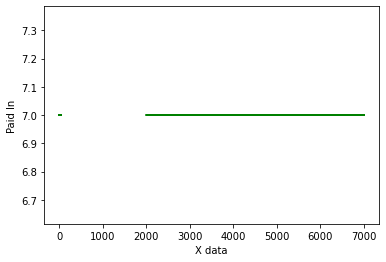

In [281]:
# # plt.scatter(X_train, Y_train, color = "red")
# plt.plot(X_train, lr.predict(X_train), color = "green")
# plt.xlabel("X data")
# plt.ylabel("Paid In")
# plt.show()

In [282]:
df.drop(columns = ['Paid In','Paid Before Deadline'])

,Invoice_issued_date,Issued_month,Due_date,Due_month,Total time to pay,Amount
0,12,2,1,3,17,2000
1,27,1,13,2,17,3491
2,25,1,11,2,17,6334
3,28,1,14,2,17,4752
4,29,1,15,2,17,2079
5,10,2,27,2,17,5261
6,22,2,11,3,17,6674
7,25,2,14,3,17,4967
8,29,4,16,5,17,2104
9,26,2,15,3,17,7000


In [283]:
def predict_date(issue_date, project, amount, 	department, 	name, due_date):
    "Invoice_issued_date	Issued_month	Due_date	Due_month	Paid In	Paid Before Deadline	Total time to pay	Amount"    
    
    issue_date = pd.to_datetime(issue_date)
    due_date = pd.to_datetime(due_date)
    amount = float(amount)
    time_to_pay = pd.to_numeric((due_date - issue_date).days)
    query_array = [ issue_date.day,  issue_date.month, due_date.day, due_date.month, time_to_pay, amount]
    result = lr.predict([query_array])[0]
    expected_date = issue_date + pd.Timedelta(days=result)
    return expected_date.to_pydatetime()



#Total time to pay	Invoice_issued_date	Issued_month	Due_date	Due_month	Amount
#days to pay	invoice_create_day	invoice_create_month	due_day	due_month	amount
#Invoice_issued_date	Issued_month	Due_date	Due_month	Paid In	Paid Before Deadline	Total time to pay	Amount

In [284]:
result = predict_date('2022-02-15',	'JMK',	3999,	'Customer Service',	'Kiari Turner','2022-3-4')
result = f'Exprected Date to pay bill: {result}'
result

'Exprected Date to pay bill: 2022-02-22 00:00:00'

In [294]:
tpot = TPOTRegressor(generations=5, random_state=42)
tpot.fit(X_train,X_train)
print(tpot.score(X_test,Y_test))
tpot.export('tpot_Invoice_PModel.py')

ValueError: Error: Input data is not in a valid format. Please confirm that the input data is scikit-learn compatible. For example, the features must be a 2-D array and target labels must be a 1-D array.

In [292]:
from tpot import TPOTRegressor

/Users/hemalpatel/opt/anaconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [291]:
pip install tpot

     |████████████████████████████████| 87 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 23.6 MB/s eta 0:00:01
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=962bda035e9e973c2c030c0f5ddc8d94691b249805088137a28942bef4d16660
  Stored in directory: /Users/hemalpatel/Library/Caches/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit
Note: you may need to restart the kernel to use updated packages.


In [ ]:
data.groupby('Department').size().plot(kind='pie', autopct='%.2f')

In [ ]:
data.groupby('Project').size().plot(kind='pie', autopct='%.2f')

In [ ]:
#Manual Function
# import datetime
# def generatePaymentBillDates(inputDateField):
#     inputDateFieldArray = inputDateField.array
#     for i in range(len(inputDateFieldArray)):
#         predictedDate = inputDateFieldArray[i] + datetime.timedelta(days=7)
#         print(predictedDate.strftime("%Y-%m-%d"))

In [ ]:
# import datetime
# def weekdays(inputDateField):
#     inputDateFieldArray = inputDateField.array
#     a = []
#     for i in range(len(inputDateFieldArray)):
#         NameofDays = inputDateFieldArray[i]
#         a.append(NameofDays.strftime('%A'))
#     return pd.Series(a, name="vals")

In [ ]:
# a = weekdays(data['Invoice date issued'])

In [ ]:
# data['Weekdays'] = a.to_frame(name = "Weekdays")